In [ ]:
import pandas as pd

# Cargar el archivo Excel (si tu archivo es CSV, cambia a pd.read_csv)
df = pd.read_csv('uac.csv')

# Ver las primeras filas para asegurarnos de que se cargó correctamente
print(df.head())

   Nro. Escuela Profesional         Sede  Edad       Sexo 1.1 Semestre  \
0     1      ADMINISTRACIÓN        CUSCO  20.0   Femenino   4 semestre   
1     2      ADMINISTRACIÓN  QUILLABAMBA  27.0  Masculino   5 semestre   
2     3      ADMINISTRACIÓN        CUSCO  22.0  Masculino  10 semestre   
3     4      ADMINISTRACIÓN  QUILLABAMBA  27.0   Femenino   7 semestre   
4     5      ADMINISTRACIÓN  QUILLABAMBA  31.0  Masculino  10 semestre   

  1.2 Estado civil 1.3 Tiene Hijos 1.4 Trabaja y estudia 1.5 Vive Solo  \
0          Soltero              No                    No            No   
1          Soltero              No                    Si            No   
2          Soltero              No                    Si            Si   
3      Conviviente              Si                    Si            Si   
4          Soltero              No                    Si            Si   

   1.6 Promedio ponderado 1.7 Nivel Socioeconómico  1.8 Excelencia académica  
0                  16.466      

In [ ]:
# Eliminar la columna 'Nro.'
df = df.drop(columns=['Nro.'])

In [ ]:
# Codificar columna 'Sexo' (0 para Masculino, 1 para Femenino)
df['SEXO'] = df['Sexo'].map({'Masculino': 0, 'Femenino': 1})

# Codificar columna 'Estado civil' (0 para Soltero, 1 para Casado, 2 para Conviviente)
df['EST_CIVIL'] = df['1.2 Estado civil'].map({'Soltero': 0, 'Casado': 1, 'Conviviente': 2})

# Codificar las columnas binarias (0 para No, 1 para Sí)
df['HIJOS'] = df['1.3 Tiene Hijos'].map({'No': 0, 'Si': 1})
df['TRABAJA_ESTUDIA'] = df['1.4 Trabaja y estudia'].map({'No': 0, 'Si': 1})
df['VIVE_SOLO'] = df['1.5 Vive Solo'].map({'No': 0, 'Si': 1})

# Codificar la columna 'Nivel Socioeconómico'
df['NIVEL_SOCIO_ECON'] = df['1.7 Nivel Socioeconómico'].map({'A': 2, 'B': 1, 'C': 0})

# Cambiar el nombre de la columna '1.8 Excelencia académica' a 'EXCELENCIA'
df = df.rename(columns={'1.8 Excelencia académica': 'EXCELENCIA'})
df = df.rename(columns={'Escuela Profesional': 'ESCUELA'})
df = df.rename(columns={'Sede': 'SEDE'})
df = df.rename(columns={'1.6 Promedio ponderado': 'PROMEDIO'})
# Verificar cambios
print(df.head())

          ESCUELA         SEDE  Edad       Sexo 1.1 Semestre 1.2 Estado civil  \
0  ADMINISTRACIÓN        CUSCO  20.0   Femenino   4 semestre          Soltero   
1  ADMINISTRACIÓN  QUILLABAMBA  27.0  Masculino   5 semestre          Soltero   
2  ADMINISTRACIÓN        CUSCO  22.0  Masculino  10 semestre          Soltero   
3  ADMINISTRACIÓN  QUILLABAMBA  27.0   Femenino   7 semestre      Conviviente   
4  ADMINISTRACIÓN  QUILLABAMBA  31.0  Masculino  10 semestre          Soltero   

  1.3 Tiene Hijos 1.4 Trabaja y estudia 1.5 Vive Solo  PROMEDIO  \
0              No                    No            No    16.466   
1              No                    Si            No    19.103   
2              No                    Si            Si    14.318   
3              Si                    Si            Si    14.088   
4              No                    Si            Si    15.463   

  1.7 Nivel Socioeconómico  EXCELENCIA  SEXO  EST_CIVIL  HIJOS  \
0                        A           0     1

In [ ]:
# Extraer el número del semestre
df['SEMESTRE'] = df['1.1 Semestre'].str.extract('(\d+)').astype(int)

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

# Opcional: eliminar filas con valores nulos
df = df.dropna()

ESCUELA                     0
SEDE                        0
Edad                        6
Sexo                        0
1.1 Semestre                0
1.2 Estado civil            0
1.3 Tiene Hijos             0
1.4 Trabaja y estudia       0
1.5 Vive Solo               0
PROMEDIO                    0
1.7 Nivel Socioeconómico    0
EXCELENCIA                  0
SEXO                        0
EST_CIVIL                   0
HIJOS                       0
TRABAJA_ESTUDIA             0
VIVE_SOLO                   0
NIVEL_SOCIO_ECON            0
SEMESTRE                    0
dtype: int64


In [ ]:
# Eliminar las columnas una por una
df = df.drop(columns=['1.1 Semestre', '1.2 Estado civil', '1.3 Tiene Hijos',
                      '1.4 Trabaja y estudia', '1.5 Vive Solo', '1.7 Nivel Socioeconómico'])
# Verificar el tipo de la columna 'SEXO' y eliminarla si es de tipo object
if df['Sexo'].dtype == 'object':
    df = df.drop(columns=['Sexo'])

# Mover la columna 'EXCELENCIA' al final
columnas = [col for col in df.columns if col != 'EXCELENCIA'] + ['EXCELENCIA']
df = df[columnas]

# Verificar que las columnas se han eliminado
print(df.head())


          ESCUELA         SEDE  Edad  PROMEDIO  SEXO  EST_CIVIL  HIJOS  \
0  ADMINISTRACIÓN        CUSCO  20.0    16.466     1          0      0   
1  ADMINISTRACIÓN  QUILLABAMBA  27.0    19.103     0          0      0   
2  ADMINISTRACIÓN        CUSCO  22.0    14.318     0          0      0   
3  ADMINISTRACIÓN  QUILLABAMBA  27.0    14.088     1          2      1   
4  ADMINISTRACIÓN  QUILLABAMBA  31.0    15.463     0          0      0   

   TRABAJA_ESTUDIA  VIVE_SOLO  NIVEL_SOCIO_ECON  SEMESTRE  EXCELENCIA  
0                0          0                 2         4           0  
1                1          0                 2         5           1  
2                1          1                 1        10           0  
3                1          1                 2         7           0  
4                1          1                 2        10           1  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8856 entries, 0 to 8861
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ESCUELA           8856 non-null   object 
 1   SEDE              8856 non-null   object 
 2   Edad              8856 non-null   float64
 3   PROMEDIO          8856 non-null   float64
 4   SEXO              8856 non-null   int64  
 5   EST_CIVIL         8856 non-null   int64  
 6   HIJOS             8856 non-null   int64  
 7   TRABAJA_ESTUDIA   8856 non-null   int64  
 8   VIVE_SOLO         8856 non-null   int64  
 9   NIVEL_SOCIO_ECON  8856 non-null   int64  
 10  SEMESTRE          8856 non-null   int64  
 11  EXCELENCIA        8856 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 899.4+ KB


In [ ]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('uac_limpio.csv', index=False)

# Mensaje de confirmación
print("El DataFrame se ha guardado correctamente en 'uac_limpio.csv'")

El DataFrame se ha guardado correctamente en 'uac_limpio.csv'


          ESCUELA         SEDE  EDAD  PROMEDIO  SEXO  EST_CIVIL  HIJOS  \
0  ADMINISTRACIÓN        CUSCO    20    16.466     1          0      0   
1  ADMINISTRACIÓN  QUILLABAMBA    27    19.103     0          0      0   
2  ADMINISTRACIÓN        CUSCO    22    14.318     0          0      0   
3  ADMINISTRACIÓN  QUILLABAMBA    27    14.088     1          2      1   
4  ADMINISTRACIÓN  QUILLABAMBA    31    15.463     0          0      0   

   TRABAJA_ESTUDIA  VIVE_SOLO  NIVEL_SOCIO_ECON  SEMESTRE  EXCELENCIA  
0                0          0                 2         4           0  
1                1          0                 2         5           1  
2                1          1                 1        10           0  
3                1          1                 2         7           0  
4                1          1                 2        10           1  
              EDAD     PROMEDIO         SEXO    EST_CIVIL        HIJOS  \
count  8856.000000  8856.000000  8856.000000  885

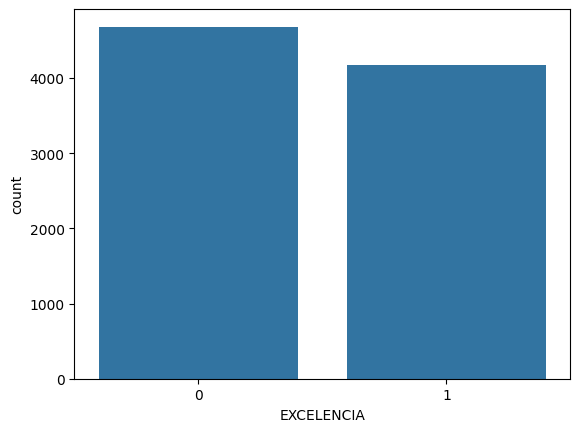

ESCUELA             0
SEDE                0
EDAD                0
PROMEDIO            0
SEXO                0
EST_CIVIL           0
HIJOS               0
TRABAJA_ESTUDIA     0
VIVE_SOLO           0
NIVEL_SOCIO_ECON    0
SEMESTRE            0
EXCELENCIA          0
dtype: int64


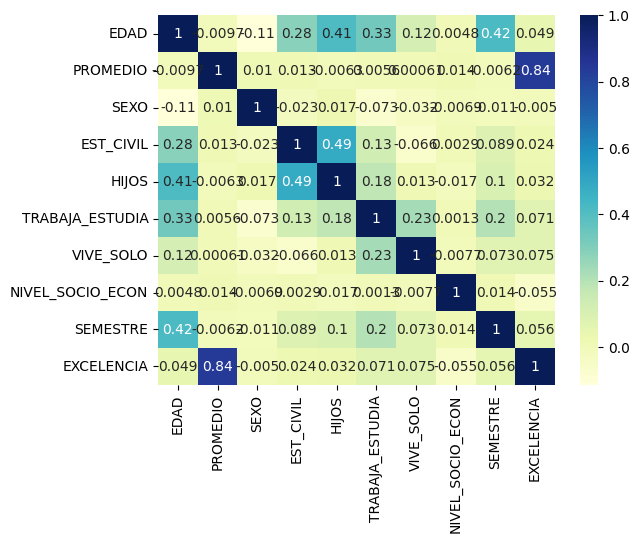

Accuracy: 0.9531602708803611
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       940
           1       0.95      0.95      0.95       832

    accuracy                           0.95      1772
   macro avg       0.95      0.95      0.95      1772
weighted avg       0.95      0.95      0.95      1772



In [ ]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos
datos = pd.read_csv("estudiantes_final1.csv")

# Ver los primeros registros
print(datos.head())

# Resumen descriptivo de los datos
print(datos.describe())

# Contar los estudiantes con y sin éxito académico
sb.countplot(x="EXCELENCIA", data=datos)
plt.show()

# Ver si hay algún valor nulo
print(datos.isna().sum())

# Correlación entre variables numéricas
sb.heatmap(datos.select_dtypes(include=np.number).corr(), annot=True, cmap="YlGnBu")
plt.show()

# Separar las variables explicativas (X) de la variable objetivo (y)
# Eliminamos 'ESCUELA' y 'SEDE' ya que no son numéricas y no son útiles para la regresión
X = datos.drop(["EXCELENCIA", "ESCUELA", "SEDE"], axis=1)
y = datos["EXCELENCIA"]

# Dividir el dataset en entrenamiento y prueba
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Regresión Logística
modelo = LogisticRegression(max_iter=1000)

# Entrenar el modelo
modelo.fit(X_ent, y_ent)

# Realizar predicciones en los datos de prueba
predicciones = modelo.predict(X_pru)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_pru, predicciones))
print("Classification Report:\n", classification_report(y_pru, predicciones))